In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read Data
merge_cases_temp_precip = pd.read_csv('Data/merge_cases_temperature_WeeklyPrecipitation_timeseries.csv')
# Remove extra column
merge_cases_temp_precip = merge_cases_temp_precip.drop('Unnamed: 0', 1)
merge_cases_temp_precip.LastDayWeek = pd.to_datetime(merge_cases_temp_precip.LastDayWeek)
merge_cases_temp_precip

,cases_medellin,DATA,YEAR,YearWeek,LastDayWeek,MONTH,temperature_medellin,percipitation_medellin,percipitation_medellin_rural,percipitation_medellin_urbano
0,1,"['2007', 'w01']",2007,200701,2007-01-06,1,21.009283,13.096688,14.097693,12.628933
1,0,"['2007', 'w02']",2007,200702,2007-01-13,1,21.009283,8.437044,6.910390,9.067214
2,0,"['2007', 'w03']",2007,200703,2007-01-20,1,21.009283,19.373165,21.616968,18.406665
3,0,"['2007', 'w04']",2007,200704,2007-01-27,1,21.009283,0.000000,0.000000,0.000000
4,0,"['2007', 'w05']",2007,200705,2007-02-03,2,20.982925,3.725206,3.144225,3.901021
...,...,...,...,...,...,...,...,...,...,...
619,28,"['2018', 'w48']",2018,201848,2018-12-01,12,20.936353,8.916642,8.656351,9.114419
620,12,"['2018', 'w49']",2018,201849,2018-12-08,12,20.936353,17.006086,16.076869,17.334870
621,27,"['2018', 'w50']",2018,201850,2018-12-15,12,20.936353,5.673248,5.388778,5.794555
622,17,"['2018', 'w51']",2018,201851,2018-12-22,12,20.936353,2.785103,2.708024,2.810241


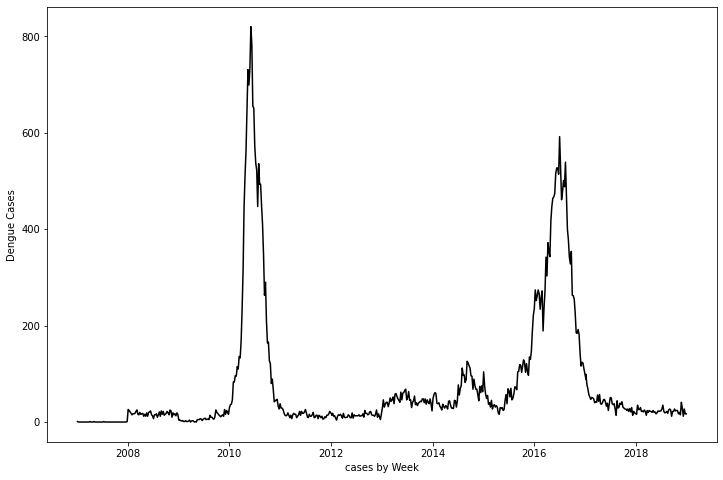

In [4]:
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (12, 8))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label) 
    plt.ylabel('Dengue Cases')

timeseries(merge_cases_temp_precip['LastDayWeek'], merge_cases_temp_precip['cases_medellin'], 'cases by Week')

# Prepare data to ARIMA model

In [5]:
dataset = merge_cases_temp_precip[['cases_medellin', 'percipitation_medellin', 'temperature_medellin']]
#dataset.index = merge_cases_temp_precip.LastDayWeek.values
dataset  #DF

,cases_medellin,percipitation_medellin,temperature_medellin
0,1,13.096688,21.009283
1,0,8.437044,21.009283
2,0,19.373165,21.009283
3,0,0.000000,21.009283
4,0,3.725206,20.982925
...,...,...,...
619,28,8.916642,20.936353
620,12,17.006086,20.936353
621,27,5.673248,20.936353
622,17,2.785103,20.936353


## Train Test Split

In [6]:
size = dataset.shape[0]
split = int(size*(9/10))

### Train

In [7]:
train = dataset[:split]
#train_data = train[['cases_medellin', 'percipitation_medellin', 'temperature_medellin']]

### Test

In [8]:
test = dataset[split:]
#test_data = test[['cases_medellin', 'percipitation_medellin', 'temperature_medellin']]

## SARIMAX model

predicted=29.940331, expected=27.000000
predicted=26.222905, expected=27.000000
predicted=26.662895, expected=24.000000
predicted=24.888477, expected=27.000000
predicted=27.673667, expected=22.000000
predicted=23.119427, expected=28.000000
predicted=29.128764, expected=21.000000
predicted=22.565220, expected=30.000000
predicted=31.031531, expected=14.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=15.917670, expected=22.000000
predicted=22.600300, expected=19.000000
predicted=18.508589, expected=16.000000
predicted=17.001811, expected=35.000000
predicted=35.712314, expected=26.000000
predicted=29.105133, expected=26.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=30.799374, expected=30.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=31.533971, expected=22.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=22.904710, expected=23.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=23.879520, expected=21.000000
predicted=20.779569, expected=25.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=25.244921, expected=22.000000
predicted=23.251114, expected=14.000000
predicted=15.493948, expected=24.000000
predicted=23.548727, expected=20.000000
predicted=20.529491, expected=24.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=26.557773, expected=22.000000
predicted=24.805231, expected=22.000000
predicted=24.336513, expected=20.000000
predicted=21.687128, expected=24.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=24.880660, expected=20.000000
predicted=21.720570, expected=21.000000
predicted=22.787924, expected=17.000000
predicted=18.231472, expected=19.000000
predicted=19.637628, expected=23.000000
predicted=23.252796, expected=22.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=23.347456, expected=23.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=25.208228, expected=23.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=24.874384, expected=27.000000
predicted=28.629954, expected=35.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=36.552227, expected=22.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=25.276366, expected=19.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=21.099747, expected=20.000000
predicted=18.610329, expected=22.000000
predicted=21.093037, expected=18.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=19.771084, expected=25.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=26.457761, expected=27.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=28.494978, expected=25.000000
predicted=28.442346, expected=12.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=15.547322, expected=22.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=21.323152, expected=22.000000
predicted=20.894004, expected=27.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=29.156674, expected=23.000000
predicted=27.053556, expected=24.000000
predicted=26.800295, expected=24.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=25.214195, expected=17.000000
predicted=18.273194, expected=20.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=20.258850, expected=15.000000
predicted=14.755106, expected=41.000000
predicted=40.650328, expected=28.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=32.414294, expected=12.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=18.294006, expected=27.000000


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=25.622299, expected=17.000000
predicted=14.524207, expected=17.000000
Test MAE: 5.646


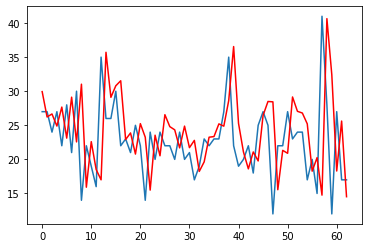

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

#history = [x for x in train_data]
history = train[['cases_medellin']].to_numpy()
exogen = train[['percipitation_medellin', 'temperature_medellin']].to_numpy()
exogen_test = test[['percipitation_medellin', 'temperature_medellin']].to_numpy()

#print(history)
predictions = list()
# walk-forward validation
#print(len(test_data))
for t in range(len(test)):    # len test -> 63  range(63)-> 0,62 1-63
    #print(t)
    model = SARIMAX(history, order=(5,0,1), seasonal_order=(0,0,0,52), exog=exogen)
    model_fit = model.fit()
    output = model_fit.forecast(exog=exogen[-1])  #nxt week predictions
    yhat = output[0]  ##nxt week output prediction
    predictions = np.append(predictions, yhat) 
    
    # Add exogenus data from test
    #print(exogen.shape)
    exogen = np.vstack((exogen, exogen_test[t]))
    #print(exogen.shape)
    #print(history.shape)
    
    obs = test[['cases_medellin']].to_numpy()[t]
    #print(obs)
    history = np.vstack((history, obs))
    #print(history.shape)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
mae = mean_absolute_error(test[['cases_medellin']].to_numpy(), predictions)  ##mean_absolute_percentage_error
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
pyplot.plot(test[['cases_medellin']].to_numpy())
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=28.008806, expected=27.000000
predicted=23.876248, expected=27.000000
predicted=24.080985, expected=24.000000
predicted=22.654639, expected=27.000000
predicted=25.786684, expected=22.000000
predicted=21.197946, expected=28.000000
predicted=27.185192, expected=21.000000
predicted=20.538029, expected=30.000000
predicted=29.413256, expected=14.000000
predicted=13.983097, expected=22.000000
predicted=20.728919, expected=19.000000
predicted=16.708848, expected=16.000000
predicted=15.167236, expected=35.000000
predicted=34.214091, expected=26.000000
predicted=27.163756, expected=26.000000
predicted=29.059357, expected=30.000000
predicted=29.742571, expected=22.000000
predicted=21.020255, expected=23.000000
predicted=22.467024, expected=21.000000
predicted=19.126847, expected=25.000000
predicted=23.401663, expected=22.000000
predicted=21.751006, expected=14.000000
predicted=14.134909, expected=24.000000
predicted=22.119126, expected=20.000000
predicted=18.496593, expected=24.000000


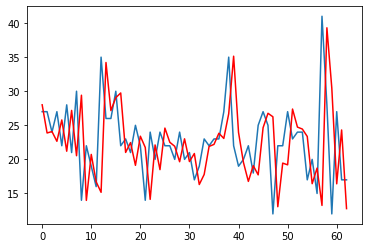

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

#history = [x for x in train_data]
history = train[['cases_medellin']].to_numpy()

#print(history)
predictions = list()
# walk-forward validation
#print(len(test_data))
for t in range(len(test)):    # len test -> 63  range(63)-> 0,62 1-63
    #print(t)
    model = SARIMAX(history, order=(5,0,1), seasonal_order=(0,0,0,52))
    model_fit = model.fit()
    output = model_fit.forecast()  #nxt week predictions
    yhat = output[0]  ##nxt week output prediction
    predictions = np.append(predictions, yhat) 
    
    obs = test[['cases_medellin']].to_numpy()[t]
    #print(obs)
    history = np.vstack((history, obs))
    #print(history.shape)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
mae = mean_absolute_error(test[['cases_medellin']].to_numpy(), predictions)  ##mean_absolute_percentage_error
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
pyplot.plot(test[['cases_medellin']].to_numpy())
pyplot.plot(predictions, color='red')
pyplot.show()

array([29.94033135])

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['cases_medellin'], order=(1,0,1), seasonal_order=(1,0,1,52), exog=train['temperature_medellin'])
results = model.fit()

